# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Background

We want to generate random numbers according to a given *probability density function* $f(x)$. If we generate random numbers using the PDF's *cumulative distribution function*, the random numbers' density will match the PDF.

This is because the probability density function is related to the cumulative distribution function by 

$$ f(x) = \frac{dF(x)}{dx} $$

The steeper the curve *F* is, the more points will be distributed there.

# Problem statement

We want to generate random numbers according to the distribution $f(x) = x^2$ in the range (0, 2), using a number of different random number distributions.

We want to generate random numbers in *f*'s distribution using uniform random random numbers in any range (0, *k*).

In order to do so, we need to compute the cumulative distribution functions of both U(0, *k*) and $f$. 

Given a random number $x_2$ generated in the uniform distribution *G*, we want to figure out which number in the (0, 2) range it maps to, 

Two different CDFs, *F* and *G*, can be equal at two different points $x_1$ and $x_2$:

$$
F(x_1) = G(x_2)
$$

We can find $x_1$:

$$
x_1 = F^-1(G(x_2))
$$



# The CDFs

The CDF of $ f(x) $ is 

$$
F(x)=\int_{0}^{x} {x^{\prime}}^{2} \mathrm{d}x^{\prime} = C\frac{x^3}{3}
$$

We can find the scaling factor by using the fact that $F(2)=1$:

$$
C \frac{2^3}{3} = 1
$$

Thus, we obtain

$$
F(x) = \frac{1}{8} x^3
$$

$$
F^{-1}(x) = (8x)^{\frac{1}{3}}
$$

The PDF of a uniform distribution is a constant function, so the cumulative distribution function is

$$
G(x) = \int_{0}^{x} c\mathrm{d}x^{\prime} = cx
$$

We can find the normalization constant by using the fact that $G(k) = 1$:

$$
ck=1
$$

So we obtain

$$
G(x) = \frac{1}{k}x
$$

In [3]:
# Preliminaries

rng = np.random.default_rng()

(array([   4.,    6.,   11.,   22.,   48.,   34.,   48.,   62.,  100.,
         134.,  147.,  173.,  214.,  237.,  276.,  289.,  352.,  390.,
         444.,  488.,  497.,  566.,  624.,  695.,  750.,  776.,  864.,
         917.,  952., 1098., 1106., 1207., 1241., 1382., 1403., 1536.,
        1519., 1760., 1698., 1833., 1949., 1965., 2143., 2246., 2304.,
        2506., 2541., 2708., 2806., 2929.]),
 array([0.03015615, 0.06955291, 0.10894966, 0.14834641, 0.18774316,
        0.22713991, 0.26653667, 0.30593342, 0.34533017, 0.38472692,
        0.42412367, 0.46352042, 0.50291718, 0.54231393, 0.58171068,
        0.62110743, 0.66050418, 0.69990094, 0.73929769, 0.77869444,
        0.81809119, 0.85748794, 0.8968847 , 0.93628145, 0.9756782 ,
        1.01507495, 1.0544717 , 1.09386846, 1.13326521, 1.17266196,
        1.21205871, 1.25145546, 1.29085222, 1.33024897, 1.36964572,
        1.40904247, 1.44843922, 1.48783598, 1.52723273, 1.56662948,
        1.60602623, 1.64542298, 1.68481974, 1.72421649, 

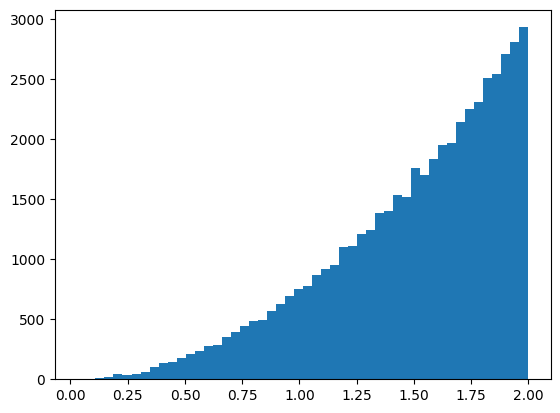

In [4]:
u1 = rng.uniform(0, 1, 50000)
# G(x) = x
f1 = np.array([(8.0 * x) ** (1.0 / 3.0) for x in u1])

plt.hist(f1, bins=50)

(array([   9.,    5.,   11.,   21.,   40.,   56.,   49.,   74.,  115.,
         117.,  154.,  196.,  192.,  225.,  274.,  287.,  364.,  391.,
         424.,  472.,  515.,  598.,  651.,  657.,  779.,  796.,  864.,
         943.,  873., 1071., 1116., 1229., 1229., 1278., 1500., 1510.,
        1566., 1678., 1738., 1878., 1960., 2049., 2175., 2203., 2384.,
        2451., 2575., 2647., 2710., 2901.]),
 array([0.04540206, 0.08449391, 0.12358575, 0.1626776 , 0.20176944,
        0.24086128, 0.27995313, 0.31904497, 0.35813681, 0.39722866,
        0.4363205 , 0.47541235, 0.51450419, 0.55359603, 0.59268788,
        0.63177972, 0.67087157, 0.70996341, 0.74905525, 0.7881471 ,
        0.82723894, 0.86633079, 0.90542263, 0.94451447, 0.98360632,
        1.02269816, 1.06179001, 1.10088185, 1.13997369, 1.17906554,
        1.21815738, 1.25724923, 1.29634107, 1.33543291, 1.37452476,
        1.4136166 , 1.45270845, 1.49180029, 1.53089213, 1.56998398,
        1.60907582, 1.64816766, 1.68725951, 1.72635135, 

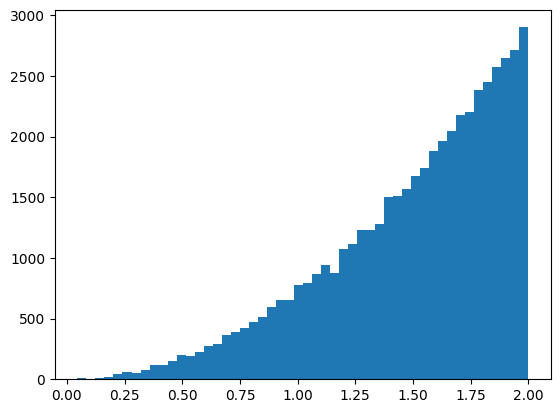

In [5]:
u2 = rng.uniform(0, 10, 50000)
# G(x) = 0.5 * x
f2 = np.array([(8.0 * (0.1 * x)) ** (1.0 / 3.0) for x in u2])

plt.hist(f2, bins=50)

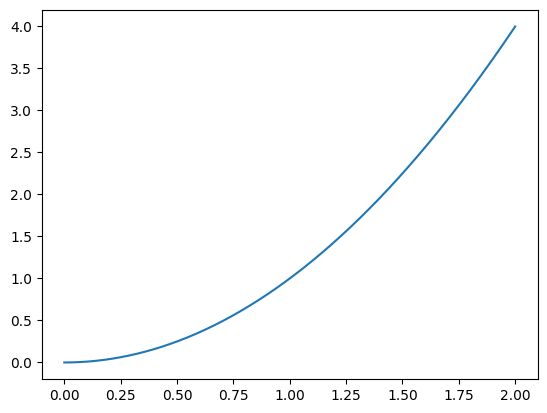

In [6]:
# Preliminaries

x = np.linspace(0, 2, 1000)
y = np.array([x*x for x in x])

plt.plot(x, y)

Let's generate random numbers in the normal distribution and see the histogram, as well as what the random numbers look like when the CDF is applied.

(array([1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 5.000e+00, 9.000e+00,
        1.000e+01, 2.400e+01, 5.500e+01, 6.800e+01, 1.140e+02, 2.260e+02,
        3.130e+02, 4.460e+02, 6.500e+02, 9.130e+02, 1.223e+03, 1.575e+03,
        1.900e+03, 2.326e+03, 2.743e+03, 3.065e+03, 3.256e+03, 3.595e+03,
        3.692e+03, 3.558e+03, 3.552e+03, 3.118e+03, 2.790e+03, 2.522e+03,
        2.104e+03, 1.668e+03, 1.314e+03, 9.520e+02, 7.160e+02, 4.900e+02,
        3.810e+02, 2.440e+02, 1.540e+02, 9.200e+01, 5.400e+01, 3.800e+01,
        1.800e+01, 1.000e+01, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-4.47401575, -4.29255455, -4.11109335, -3.92963216, -3.74817096,
        -3.56670977, -3.38524857, -3.20378738, -3.02232618, -2.84086499,
        -2.65940379, -2.4779426 , -2.2964814 , -2.11502021, -1.93355901,
        -1.75209782, -1.57063662, -1.38917542, -1.20771423, -1.02625303,
        -0.84479184, -0.66333064, -0.48186945, -0.30040825, -0.11894706,
         0.

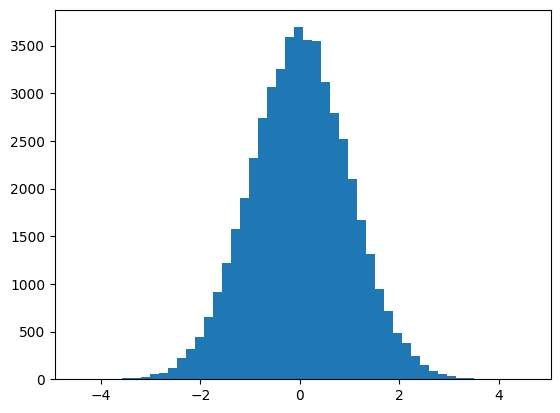

In [7]:
n = rng.normal(loc=0.0, scale=1.0, size=50000)
plt.hist(n, bins=50)

(array([ 980.,  952., 1001.,  994., 1016.,  983., 1012.,  979.,  999.,
         993., 1050., 1027.,  952.,  986.,  997.,  994., 1046.,  924.,
         954., 1026., 1035.,  986., 1001.,  991., 1032., 1031.,  977.,
         961., 1037., 1046., 1001., 1072., 1070.,  949.,  926., 1048.,
         983.,  988., 1015.,  955., 1059., 1007., 1031., 1029., 1005.,
        1012.,  959.,  959.,  961., 1009.]),
 array([3.83820427e-06, 2.00037190e-02, 4.00035998e-02, 6.00034806e-02,
        8.00033614e-02, 1.00003242e-01, 1.20003123e-01, 1.40003004e-01,
        1.60002885e-01, 1.80002765e-01, 2.00002646e-01, 2.20002527e-01,
        2.40002408e-01, 2.60002289e-01, 2.80002169e-01, 3.00002050e-01,
        3.20001931e-01, 3.40001812e-01, 3.60001692e-01, 3.80001573e-01,
        4.00001454e-01, 4.20001335e-01, 4.40001216e-01, 4.60001096e-01,
        4.80000977e-01, 5.00000858e-01, 5.20000739e-01, 5.40000620e-01,
        5.60000500e-01, 5.80000381e-01, 6.00000262e-01, 6.20000143e-01,
        6.40000024e-01, 

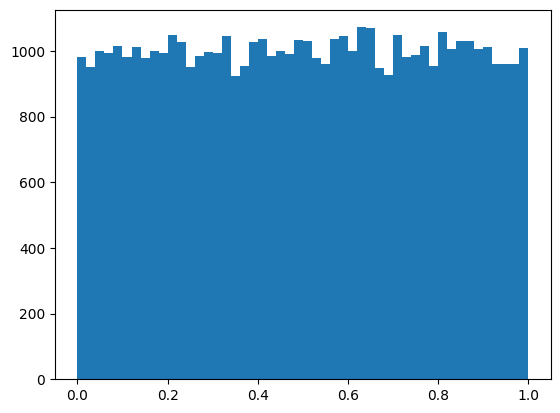

In [8]:
n_cdf = np.array([0.5 * (1.0 + math.erf(x / (math.sqrt(2.0)))) for x in n])
plt.hist(n_cdf, bins=50)

Thus we can see that applying the CDF to the random numbers in a given distribution undoes the density distribution. We can now generate random numbers distributed as x^2 using normally distributed random numbers.

(array([   4.,    7.,   11.,   15.,   26.,   49.,   52.,   66.,   94.,
         132.,  152.,  163.,  209.,  211.,  243.,  287.,  359.,  393.,
         422.,  456.,  542.,  564.,  648.,  644.,  749.,  760.,  857.,
         910.,  989., 1077., 1123., 1151., 1289., 1337., 1419., 1435.,
        1628., 1699., 1749., 1920., 1904., 2104., 2230., 2248., 2342.,
        2421., 2622., 2713., 2756., 2819.]),
 array([0.03131406, 0.07068775, 0.11006144, 0.14943513, 0.18880882,
        0.22818251, 0.2675562 , 0.30692989, 0.34630358, 0.38567727,
        0.42505096, 0.46442465, 0.50379834, 0.54317204, 0.58254573,
        0.62191942, 0.66129311, 0.7006668 , 0.74004049, 0.77941418,
        0.81878787, 0.85816156, 0.89753525, 0.93690894, 0.97628263,
        1.01565632, 1.05503001, 1.0944037 , 1.13377739, 1.17315108,
        1.21252477, 1.25189847, 1.29127216, 1.33064585, 1.37001954,
        1.40939323, 1.44876692, 1.48814061, 1.5275143 , 1.56688799,
        1.60626168, 1.64563537, 1.68500906, 1.72438275, 

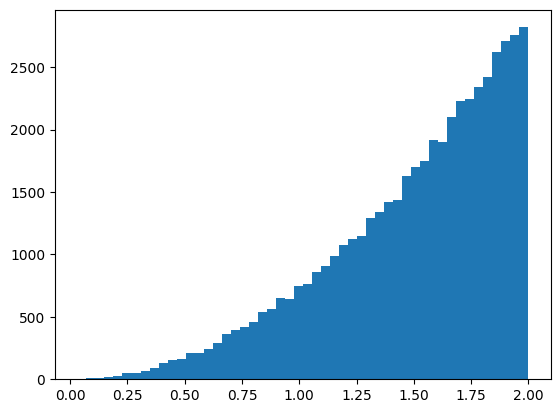

In [9]:
# And here, we finally generate x^2 distributed random numbers using normally distributed random numbers.
f3 = np.array([(8.0 * (0.5 * (1.0 + math.erf(x / math.sqrt(2.0))))) ** (1.0 / 3.0) for x in n])
plt.hist(f3, bins=50)